In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2 as cv

Для тренировки модели

In [ ]:
model = YOLO("yolov8n.yaml")

results = model.train(data='train.yaml', epochs=100, imgsz=660)

Скачивание уже готовой модели

In [2]:
model2 = YOLO("last.pt")

In [7]:
img = cv.imread('images/image copy 3.png')

In [8]:
predict = model2.predict(source=img, imgsz=448)


0: 256x448 1 plate, 52.9ms
Speed: 3.0ms preprocess, 52.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 448)


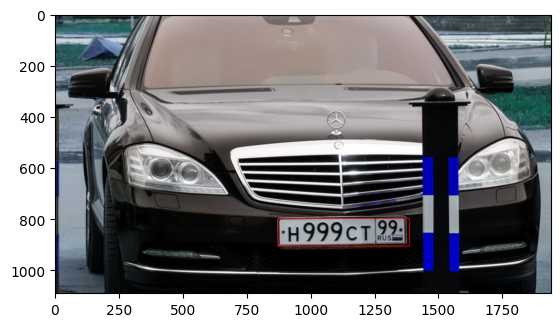

In [13]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
for box in predict[0].boxes.xyxy:
    img = cv.rectangle(img, (int(box[0]), int(box[1])),
                  (int(box[2]), int(box[3])), (255, 0, 0), 2)


plt.imshow(img)

In [14]:
import tensorflow as tf
import numpy as np

2024-03-15 14:33:32.413913: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 14:33:32.413960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 14:33:32.415173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
reader = tf.keras.models.load_model('ocr/ocr_model.h5')

2024-03-15 14:33:35.494685: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [17]:
def get(img2, reader):
    
    model = YOLO("last.pt")
    pred = model.predict(img2)
    letters = []
    pre = np.zeros((1, 42, 128))
    for bbox in pred[0].boxes.xyxy:
        xmin = bbox[0]
        ymin = bbox[1]
        xmax = bbox[2]
        ymax = bbox[3]

        crop = img2[int(ymin):int(ymax), int(xmin):int(xmax)]
        crop = cv.cvtColor(crop, cv.COLOR_BGR2GRAY)
        crop = crop / 255.0
        crop = cv.resize(crop, (128, 42))
        pre[0] = crop
        plt.imshow(crop, cmap='gray')
        letters.append(reader.predict(pre))
        
    return letters


0: 384x672 1 plate, 81.2ms
Speed: 1.9ms preprocess, 81.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 672)
1/1 [==============================] - 0s 226ms/step


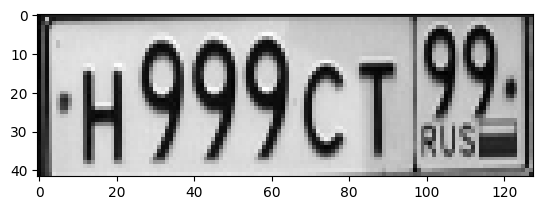

In [18]:
answer = get(img, reader)

In [19]:
def convert_matrix_to_vector(matrix):
    dist_items = { '0':'0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9',
               '10':'A' , '11':'B', '12':'E', '13':'K', '14':'M', '15': 'H', '16': 'O', '17': 'P',
               '18':'C' , '19':'T' , '20': 'Y', '21': 'X', '22': ' '}
    vector = []
    for row in matrix:
        vector.append(dist_items.get(str(np.argmax(row))))
    return vector

['H', '9', '9', '9', 'C', 'T', '9', '9']


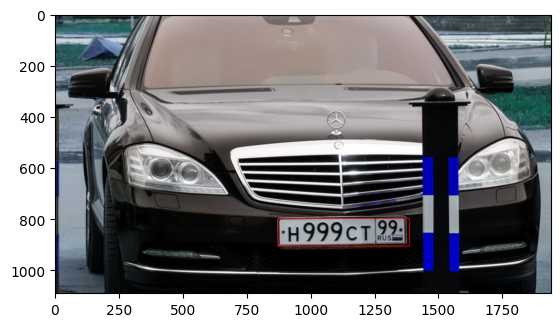

In [20]:
print(convert_matrix_to_vector(answer[0]))
plt.imshow(img)